### Import modules

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightkurve as lk

### Read in tables for Kepler Sample

In [14]:
kep = pd.read_csv("../tables/kepler_sample_classified.csv")
kep

,Unnamed: 0,col1,KIC,Porb,Class,PACF,hACF,P1min,P1max,P2min,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,0,0,1026032,8.460,sp,10.932,0.588,10.778,11.162,NaN,...,0.0702,0.0665,0.0781,PHOENIX,291.044046,36.729247,0.366295,0.416110,-0.0724,0.244992
1,1,1,1026957,21.761,sp,20.883,1.047,20.358,21.802,NaN,...,0.0644,0.0606,0.0671,MARCS,291.254465,36.743581,0.143528,0.166377,-0.0475,0.664894
2,2,2,1161345,8.575,sp,7.969,0.381,7.994,8.227,NaN,...,0.0933,0.0895,0.0965,MARCS,291.048935,36.840044,0.218353,0.250004,-0.0372,0.765120
3,3,3,1432214,161.788,np,161.670,0.157,NaN,NaN,NaN,...,0.1086,0.1041,0.1141,MARCS,291.382667,37.072997,0.456929,0.502884,-0.1634,0.180588
4,4,4,1433410,0.283,ev,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,291.637728,37.082271,6.485481,7.306751,-0.1830,0.271384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2267,1999,10934755,0.786,ev,NaN,NaN,NaN,NaN,NaN,...,0.2504,0.2432,0.2589,A,297.707536,48.337691,0.299021,0.286393,-0.1561,0.096654
2268,2268,2000,10935310,4.129,sp,3.985,0.879,3.945,3.959,NaN,...,0.0096,0.0048,0.0153,MARCS,297.915914,48.332066,0.255169,0.219660,-0.1096,0.337873
2269,2269,2001,10936427,14.361,sp,16.919,0.816,16.644,17.794,NaN,...,0.1609,0.1274,0.1899,MARCS,298.343796,48.335889,0.343978,0.272092,0.0869,0.040408
2270,2270,2002,10937609,2.570,ev,NaN,NaN,NaN,NaN,NaN,...,0.0815,0.0688,0.0869,PHOENIX,298.741610,48.326914,0.203801,0.238173,0.0158,0.447516


In [15]:
tess = pd.read_csv("../tables/tess_sample_unclassified.csv")
tess

,Unnamed: 0,TIC,period,morph,RA,DEC
0,1,107548305,0.048979,0.949,212.817308,-30.884359
1,2,467187065,0.064162,0.499,296.178558,54.828580
2,3,369586828,0.082014,0.629,2.517347,-46.015651
3,4,611402948,0.093370,0.472,18.412876,22.960853
4,5,99641129,0.095646,0.543,107.675213,66.928756
...,...,...,...,...,...,...
4024,4065,28224552,9.926588,0.123,28.083357,25.455465
4025,4066,252554485,9.942987,0.610,345.099656,48.302684
4026,4067,11491822,9.946591,0.207,96.607650,56.285099
4027,4068,380783252,9.965309,0.716,269.714465,-60.921834


### Read in lightcurve data

In [18]:
def load_lc(kic, survey='kepler'):
    
    if survey == 'kepler':
        loaded = np.load(f"../lurie_lc/KIC{str(kic)}.npz")
    elif survey == 'tess':
        loaded = np.load(f"../tess_lc/TIC{str(kic)}.npz")
    lc = lk.LightCurve(time=loaded['time'], flux=loaded['flux'], flux_err=loaded['flux_err']).remove_nans()
    
    return lc

Plot the first lightcurve from the Kepler sample using the 'KIC' column, which is the Kepler object ID 

In [32]:
kep_lc = load_lc(1026032, survey="kepler")
kep_lc.head()

time,flux,flux_err
,,
Time,float32,float32
131.5127135392686,0.9992637038230896,0.00032333453418686986
131.53314824846893,0.9986885786056519,0.00032376719173043966
131.55358285744296,0.9984066486358643,0.00032376963645219803
131.57401736640895,0.9977231025695801,0.0003233867755625397
131.59445197515015,0.9977293014526367,0.000323840940836817


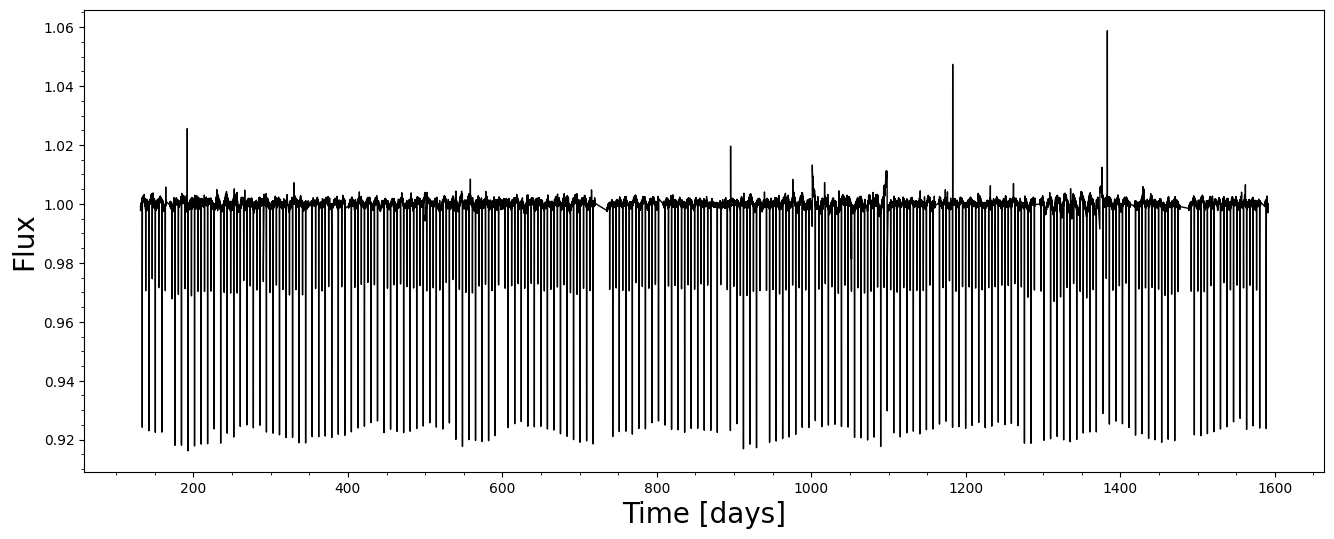

In [33]:
fig = plt.figure(figsize=[16,6])
plt.plot(kep_lc.time.value, kep_lc.flux.value, color='k', linewidth=1)
plt.xlabel("Time [days]", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.minorticks_on()
plt.show()

Plot a lightcurve from the TESS sample using the 'TIC' column, which is the TESS object ID 

In [39]:
tess_lc = load_lc(467187065, survey="tess")
tess_lc.head()

time,flux,flux_err
,,
Time,float32,float32
1683.3553468161997,0.8542219400405884,0.15244193375110626
1683.3567357244035,1.0427498817443848,0.1528262197971344
1683.3581246326078,1.1331474781036377,0.15295691788196564
1683.3595135408111,0.891593873500824,0.1526671200990677
1683.3609024490142,0.7637194395065308,0.15497547388076782


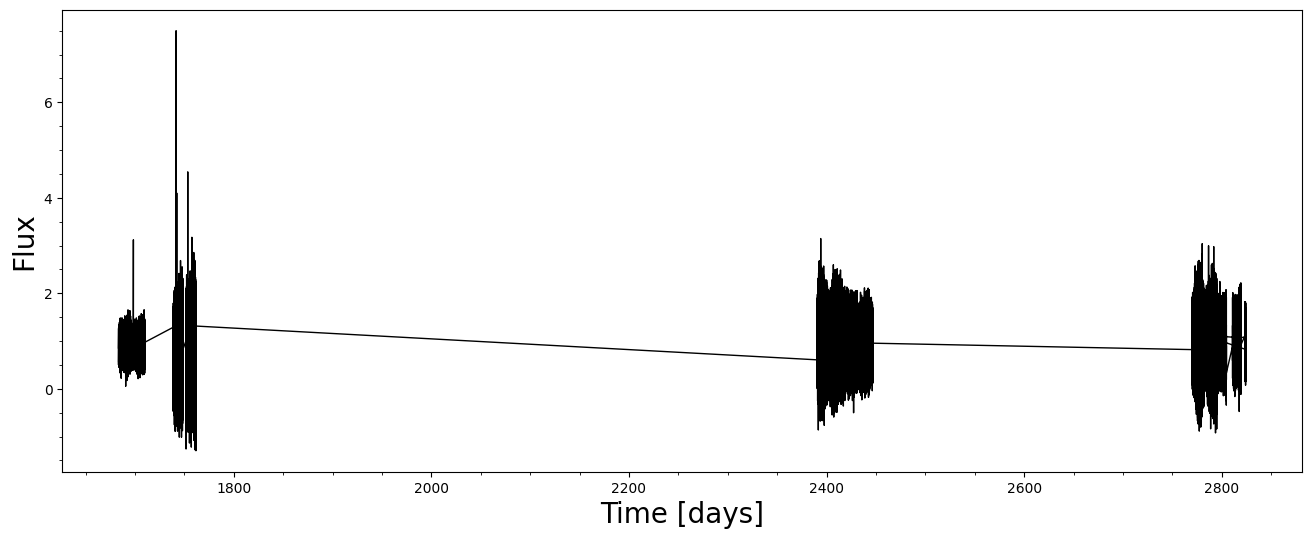

In [40]:
fig = plt.figure(figsize=[16,6])
plt.plot(tess_lc.time.value, tess_lc.flux.value, color='k', linewidth=1)
plt.xlabel("Time [days]", fontsize=20)
plt.ylabel("Flux", fontsize=20)
plt.minorticks_on()
plt.show()